In this notebook I will be completing Part 3 of the Ultimate challenge, which involves predictive modeling to predict rider retention. I will use the data provided in order to predict whether or not a user will be active in the 6th month on the system, and to leverage this model for insights.

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
# First let's load in the data:
with open('ultimate_data_challenge.json') as f:
    dict_json = json.load(f)
df = pd.DataFrame(dict_json)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


There are some missing values here in this dataframe...I think since most of the data is intact, the easiest and best course of action is to just remove these problem rows.

In [4]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41445 entries, 0 to 41444
Data columns (total 12 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null object
phone                     41445 non-null object
signup_date               41445 non-null object
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.5+ MB


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
7,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
8,4.28,4.9,5.0,1.00,Winterfell,2014-05-30,iPhone,2014-01-13,0.0,1,True,100.0
9,3.81,5.0,4.0,1.00,Winterfell,2014-01-10,iPhone,2014-01-06,0.0,3,False,100.0


In [5]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,5.460046,4.776446,4.601720,1.073822,8.898709,2.609675,61.254897
std,5.145174,0.404606,0.616104,0.198747,18.322061,4.059336,34.813848
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,37.500000
50%,3.780000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.490000,5.000000,5.000000,1.070000,11.100000,3.000000,100.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


First, now that we have a cleaned dataset, we need to actually create a target variable. In particular, we want to track retention, which is defined here as continuing to use the product five months after the initial signup. To figure this out, we will have to use the signup and last_trip dates in order to figure out whether or not the users meet this criterion. These are strings that look like datetimes, so I'll need to do some finagling.

In [6]:
# What is the signup range? The last ride range?
print('Min signup date: {}\nMax signup date: {}'.format(min(df.signup_date), max(df.signup_date)))
print('Min last trip date: {}\nMax last trip date: {}'.format(min(df.last_trip_date), max(df.last_trip_date)))

Min signup date: 2014-01-01
Max signup date: 2014-01-31
Min last trip date: 2014-01-01
Max last trip date: 2014-07-01


Given the range for the rides, the math for checking retention is simplified. For a larger range, this approach would need to be modified, likely using datetimes.

In [7]:
def retention_check(signup_date, last_trip_date):
    """Checks if the signup date and last trip date are six months or more apart."""
    
    sign_yr, sign_mth, sign_day = signup_date.split('-')
    last_yr, last_mth, last_day = last_trip_date.split('-')
    
    # If they are active in their 7th month or greater:
    if (int(last_mth) - int(sign_mth)) >= 6:
        return 1
    # If the month difference might be the 6th month (or end of 5th), check the day:
    elif (int(last_mth) - int(sign_mth)) == 5:
        if (int(last_day) - int(sign_day)) >= 0:   # in their 6th month
            return 1
        else:   # In their 5th month
            return 0
    # Anything else has retention = 0:
    else:
        return 0

In [8]:
target_list = [retention_check(x,y) for x,y in zip(df.signup_date.values, df.last_trip_date.values)]
df['Target'] = target_list

In [9]:
# Convert the boolean column of ultimate black users to ints:
df['ultimate_black_user'] = df['ultimate_black_user'].astype(int)

In [10]:
# See if I can make the phone column more relevant as features:
df['Android'] = df.apply(lambda x: 1 if x.phone == 'Android' else 0, axis=1)
df['iPhone'] = df.apply(lambda x: 0 if x.phone == 'Android' else 1, axis=1)
df = df.drop(['phone'], axis=1)

In [11]:
# See if I can make the city column more relevant as features:
df['Astapor'] = df.apply(lambda x: 1 if x.city == 'Astapor' else 0, axis=1)
df['Kings_Landing'] = df.apply(lambda x: 1 if x.city == "King's Landing" else 0, axis=1)
df['Winterfell'] = df.apply(lambda x: 1 if x.city == 'Winterfell' else 0, axis=1)
df = df.drop(['city'], axis=1)

In [12]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Target,Android,iPhone,Astapor,Kings_Landing,Winterfell
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,5.460046,4.776446,4.601720,1.073822,8.898709,2.609675,0.384099,61.254897,0.271106,0.291784,0.708216,0.325950,0.211726,0.462324
std,5.145174,0.404606,0.616104,0.198747,18.322061,4.059336,0.486387,34.813848,0.444536,0.454589,0.454589,0.468734,0.408537,0.498584
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,0.000000,37.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.780000,5.000000,4.900000,1.000000,0.000000,1.000000,0.000000,66.700000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6.490000,5.000000,5.000000,1.070000,11.100000,3.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now that we have a target, we can see that only 27% of the customers are retained after six months. One possible problem with this data is the small time window we are looking at: there are many reasons why a person might stop using a service for a month or two before returning to the product. Given that the whole time window is 7 months, this might not capture that userbase, which would be a selection bias. However, given this is our data, we'll continue with this in mind.

Another problem we'll have to deal with is the imbalance in the dataset. This is, afterall, a binary classification problem, but with only 27% of the data being in one class (positive). So this will also need to be addressed prior to the modeling.

# EDA and Inferential Statistics

Let's start by looking at some of the features and how they relate to each other and to the target variable.

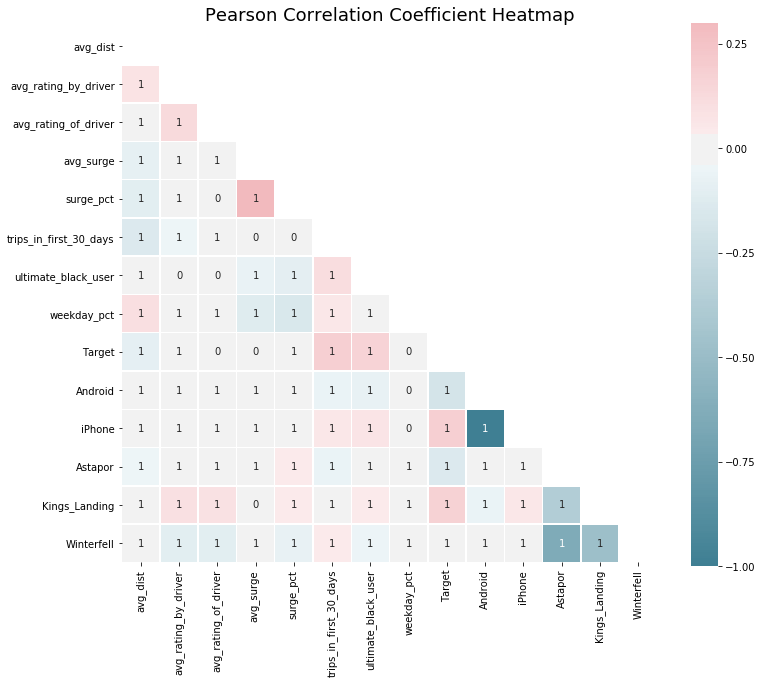

In [13]:
# Adapted from seaborn gallery: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Correlation matrix for dataset:
corr = df.drop(['last_trip_date', 'signup_date'], axis=1).corr()

# Create the p_values for annotation -- 1 if statistically sig., 0 if not:
corr_pvals = np.zeros((14,14))
for i, col in enumerate(corr.columns):
    for j, column in enumerate(corr.columns):
        if pearsonr(df[col], df[column])[1] <=0.05:
            corr_pvals[j,i] = 1
        else:
            corr_pvals[j,i] = 0

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set up the matplotlib figure
fig, axes = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=corr_pvals)
_ = axes.set_title('Pearson Correlation Coefficient Heatmap', fontsize=18)
plt.show()

An important consideration for this type of predictive modeling is that you don't want the features you're using to be highly correlated (or anti-correlated), so the above plot helps visualize this check. This plot is a heat map showing all of the pearson correlation coefficients between the features (and target) as well as how strong the correlations are, and whether or not the pearson correlation coefficients are statistically significant (1 if yes, 0 if no).

From this information we can see that there is a positive correlation between the surge pricing feature (percentage of trips taken with price surges) and the avg surge feature (the average surge multiplier over all trips). This makes sense...the more trips you take with surge pricing, the higher your average surge multiplier over your trips. Given that the surge_pct feature has a slight positive, statistically significant correlation with the target variable, while the avg_surge feature has a not-statistically significant weak anti-correlation, I think it would be better to eliminate the latter from the modeling procedure.

Another potential concern is a slight positive correlation between the ratings of drivers and the ratings by drivers, which is statistically significant. This could potentially warrant removal of one of these features.

The other potential concern is a number of potential correlations between the average distance traveled and a variety of the other features, both positive and negative, all statistically significant.

Some of the features are categorical in nature (the phone and city variables, for example), and so those can be ignored with each other of the same type, as they are 0 or 1 when the others are 0 or 1.

I think a good way to deal with these potential concerns is to do a feature importance analysis to see if any should be eliminated.

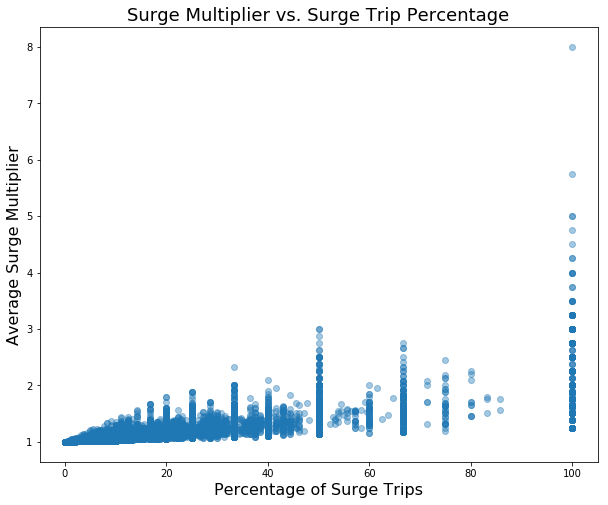

In [15]:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.scatter(df.surge_pct.values, df.avg_surge.values, alpha=0.4)
_ = axes.set_ylabel('Average Surge Multiplier', fontsize=16)
_ = axes.set_xlabel('Percentage of Surge Trips', fontsize=16)
_ = axes.set_title('Surge Multiplier vs. Surge Trip Percentage', fontsize=18)
plt.show()

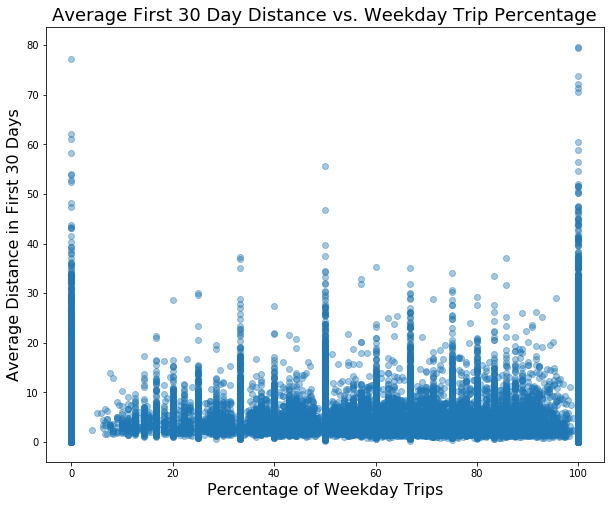

In [16]:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.scatter(df.weekday_pct.values, df.avg_dist.values, alpha=0.4)
_ = axes.set_ylabel('Average Distance in First 30 Days', fontsize=16)
_ = axes.set_xlabel('Percentage of Weekday Trips', fontsize=16)
_ = axes.set_title('Average First 30 Day Distance vs. Weekday Trip Percentage', fontsize=18)
plt.show()

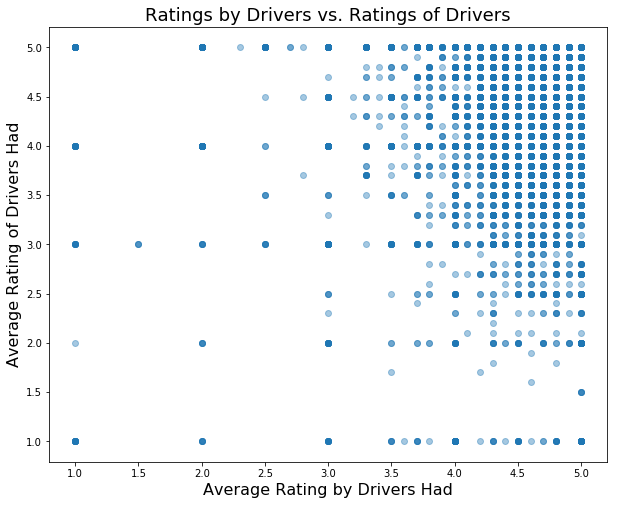

In [17]:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.scatter(df.avg_rating_by_driver.values, df.avg_rating_of_driver.values, alpha=0.4)
_ = axes.set_ylabel('Average Rating of Drivers Had', fontsize=16)
_ = axes.set_xlabel('Average Rating by Drivers Had', fontsize=16)
_ = axes.set_title('Ratings by Drivers vs. Ratings of Drivers', fontsize=18)
plt.show()

Definitely some interesting scatterplots, focusing on some of the stronger correlations found in the features. The first definitely seems problematic, but the latter two seem less so visually. But I think the feature importance analysis may shed some extra light on whether some of the features should be eliminated.

# Balance the Dataset

The dataset is imbalanced and needs to be balanced before we can continue into the modeling. I will use an oversampling method to do so, called SMOTE.

In [39]:
from imblearn.over_sampling import SMOTE

# Separate out features and target:
y_before = df.loc[:, 'Target']
X_before = df.drop(['Target', 'avg_surge', 'last_trip_date', 'signup_date'], axis=1)

# Do a train-test split of 70-30 on the new dataset:
X_train_before, X_test_res, y_train_before, y_test_res = train_test_split(X_before, y_before, 
                                                test_size=0.3, random_state=42)

# Balance the training set with SMOTE-SVM:
sm = SMOTE(kind='svm', random_state=42)  # Without an input ratio, will generate until equal representation
X_train_res, y_train_res = sm.fit_sample(X_train_before, y_train_before)

# Feature Importance Analysis and Modeling

Let's do feature importance analysis and modeling using the Random Forest Classifier.

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Run Random Forest with a grid search:
n_estimates = [150, 200, 250]
max_feats = [2, 3, 4]
max_depth = [1, 2, 3]

rf = RandomForestClassifier(random_state=42)
clf_grid = GridSearchCV(rf, {'n_estimators': n_estimates, 'max_features': max_feats, 'max_depth': max_depth}
                        , cv=5, scoring='accuracy')
clf_grid.fit(X_train_res, y_train_res)

# Predict on the test (and training) set to calculate metrics:
y_predict_train = clf_grid.predict(X_train_res)
y_predict_test = clf_grid.predict(X_test_res)

print('Best parameters for n_estimators, max_features, and max_depth: \n')
print(clf_grid.best_params_, clf_grid.best_score_)

Best parameters for n_estimators, max_features, and max_depth: 

{'max_depth': 3, 'max_features': 2, 'n_estimators': 250} 0.7623423253177115


In [42]:
# Run Random Forest again, this time with the best parameters from the previous grid search:
rf = RandomForestClassifier(n_estimators=250, max_features=2, max_depth=3, random_state=42)
rf.fit(X_train_res, y_train_res)

# See how the variables did based on mean decrease gini impurity:
names = X_before.columns
y_predict_res = rf.predict(X_test_res)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))
print('')
print(rf.score(X_test_res, y_test_res))
print('')
print(confusion_matrix(y_predict_res, y_test_res))
print(classification_report(y_test_res, y_predict_res))

Features sorted by their score:
[(0.231, 'avg_rating_by_driver'), (0.1356, 'surge_pct'), (0.1226, 'weekday_pct'), (0.1163, 'avg_rating_of_driver'), (0.094, 'Android'), (0.089, 'iPhone'), (0.064, 'Kings_Landing'), (0.0578, 'ultimate_black_user'), (0.0429, 'trips_in_first_30_days'), (0.0323, 'Astapor'), (0.0127, 'Winterfell'), (0.0018, 'avg_dist')]

0.7400675566993727

[[6957 1147]
 [2085 2245]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      9042
           1       0.52      0.66      0.58      3392

   micro avg       0.74      0.74      0.74     12434
   macro avg       0.69      0.72      0.70     12434
weighted avg       0.77      0.74      0.75     12434



In [45]:
# Separate out features and target:
y_before = df.loc[:, 'Target']
X_before = df.drop(['Target', 'avg_surge', 'last_trip_date', 'signup_date', 'Winterfell', 'Astapor',
                  'iPhone', 'avg_dist'], axis=1)

# Do a train-test split of 70-30 on the new dataset:
X_train_before, X_test_res, y_train_before, y_test_res = train_test_split(X_before, y_before, 
                                                test_size=0.3, random_state=42)

# Balance the training set with SMOTE-SVM:
sm = SMOTE(kind='svm', random_state=42)  # Without an input ratio, will generate until equal representation
X_train_res, y_train_res = sm.fit_sample(X_train_before, y_train_before)

# Run Random Forest with a grid search:
n_estimates = [150, 200, 250]
max_feats = [2, 3, 4]
max_depth = [1, 2, 3]

rf = RandomForestClassifier(random_state=42)
clf_grid = GridSearchCV(rf, {'n_estimators': n_estimates, 'max_features': max_feats, 'max_depth': max_depth}
                        , cv=5, scoring='accuracy')
clf_grid.fit(X_train_res, y_train_res)

# Predict on the test (and training) set to calculate metrics:
y_predict_train = clf_grid.predict(X_train_res)
y_predict_test = clf_grid.predict(X_test_res)

print('Best parameters for n_estimators, max_features, and max_depth: \n')
print(clf_grid.best_params_, clf_grid.best_score_)

Best parameters for n_estimators, max_features, and max_depth: 

{'max_depth': 3, 'max_features': 2, 'n_estimators': 150} 0.7531771153210186


In [48]:
# Run Random Forest with best fit parameters from the grid search:
rf = RandomForestClassifier(n_estimators=150, max_features=2, max_depth=3, random_state=42)
rf.fit(X_train_res, y_train_res)

# See how the variables did based on mean decrease gini impurity:
names = X_before.columns
y_predict_res = rf.predict(X_test_res)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))
print('')
print(rf.score(X_test_res, y_test_res))
print('')
print(confusion_matrix(y_predict_res, y_test_res))
print(classification_report(y_test_res, y_predict_res))

Features sorted by their score:
[(0.2957, 'avg_rating_by_driver'), (0.2108, 'surge_pct'), (0.1509, 'weekday_pct'), (0.1044, 'avg_rating_of_driver'), (0.0979, 'Android'), (0.0645, 'Kings_Landing'), (0.0574, 'ultimate_black_user'), (0.0184, 'trips_in_first_30_days')]

0.727923435740711

[[6742 1083]
 [2300 2309]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      9042
           1       0.50      0.68      0.58      3392

   micro avg       0.73      0.73      0.73     12434
   macro avg       0.68      0.71      0.69     12434
weighted avg       0.76      0.73      0.74     12434



So the random forest classifier we ran picked up on a number of things, like the weakness of a number of features, most notably that of the average distance traveled in the first 30 days, which seemed to have no bearing on prediction of retention. After removing some of the weakest and correlated features, the accuracy didn't improve (it went slightly down) but the recall improved, showing a slightly better rate of predicting those retained at a slight prediction cost of those leaving. Given the imbalance in this dataset, and given a desire to find those who stayed, I think this is a relevant tradeoff.

The most important feature appears to be the average rating by driver, which seems to imply either that the behavior of riders overall can tell us something about whether they will be retained, or that relationship with drivers is important, which makes sense. It also appears important whether or not a large percentage of their rides took place during a surge. This information could be really important for Ultimate to look into, as they can alter their surge algorithm to help retain ridership. I find it surprising that there's a larger importance on Phone than some other features, perhaps pointing to looking into whether or not there are any problems with any cell phone apps (or good things on one app versus another).

With a quality model, one can predict whether or not a rider is likely to stay retained and using the app. Should they be predicted to leave, they can develop relevant strategies to try and reverse that person's course, perhaps with incentives to stay (e.g., rider coupons, timing bonus, referral credits). I believe that given this model was over 70% accurate and didn't take much work to create, more intensive modeling efforts could improve upon this and be really effective for the company.